# Predicción de Enfermedad Cardíaca con XGBoost

## Objetivo
Predecir la presencia de enfermedad cardíaca en pacientes utilizando XGBoost y características clínicas.

## Estructura del Análisis
1. **Parte 1: Exploración Inicial**
2. **Parte 2: Análisis Exploratorio de Datos (EDA)**
3. **Parte 3: Preprocesamiento de Datos**
4. **Parte 4: Implementación de XGBoost**

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# PARTE 1: EXPLORACIÓN INICIAL

## 1.1 Cargar y Revisar la Estructura del Dataset

In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/heart.csv"
df = pd.read_csv(path)

In [4]:
# Cargar el dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## 1.2 Descripción de Variables y su Distribución

In [6]:
# Descripción detallada de cada variable
print("=== DESCRIPCIÓN DETALLADA DE VARIABLES ===")
print("\n1. age: Edad del paciente en años")
print("2. sex: Sexo del paciente (Male/Female)")
print("3. dataset: Origen de los datos (Cleveland, Hungary, Switzerland, VA Long Beach)")
print("4. cp: Tipo de dolor en el pecho")
print("   - typical angina: Angina típica")
print("   - atypical angina: Angina atípica")
print("   - non-anginal: Dolor no anginoso")
print("   - asymptomatic: Asintomático")
print("5. trestbps: Presión arterial en reposo (mm Hg)")
print("6. chol: Colesterol sérico (mg/dl)")
print("7. fbs: Azúcar en sangre en ayunas > 120 mg/dl (True/False)")
print("8. restecg: Resultados electrocardiográficos en reposo")
print("9. thalch: Frecuencia cardíaca máxima alcanzada")
print("10. exang: Angina inducida por ejercicio (True/False)")
print("11. oldpeak: Depresión ST inducida por ejercicio")
print("12. slope: Pendiente del segmento ST")
print("13. ca: Número de vasos principales coloreados (0-3)")
print("14. thal: Talasemia")
print("15. num: Diagnóstico de enfermedad cardíaca (0=No, 1-4=Sí)")

print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)

=== DESCRIPCIÓN DETALLADA DE VARIABLES ===

1. age: Edad del paciente en años
2. sex: Sexo del paciente (Male/Female)
3. dataset: Origen de los datos (Cleveland, Hungary, Switzerland, VA Long Beach)
4. cp: Tipo de dolor en el pecho
   - typical angina: Angina típica
   - atypical angina: Angina atípica
   - non-anginal: Dolor no anginoso
   - asymptomatic: Asintomático
5. trestbps: Presión arterial en reposo (mm Hg)
6. chol: Colesterol sérico (mg/dl)
7. fbs: Azúcar en sangre en ayunas > 120 mg/dl (True/False)
8. restecg: Resultados electrocardiográficos en reposo
9. thalch: Frecuencia cardíaca máxima alcanzada
10. exang: Angina inducida por ejercicio (True/False)
11. oldpeak: Depresión ST inducida por ejercicio
12. slope: Pendiente del segmento ST
13. ca: Número de vasos principales coloreados (0-3)
14. thal: Talasemia
15. num: Diagnóstico de enfermedad cardíaca (0=No, 1-4=Sí)

=== TIPOS DE DATOS ===
id            int64
age           int64
sex          object
dataset      object
cp    

In [7]:
# Distribución de variables numéricas
print("=== DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ===")
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas: {variables_numericas}")
print("\nEstadísticas descriptivas:")
df[variables_numericas].describe()

=== DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ===
Variables numéricas: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

Estadísticas descriptivas:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
# Distribución de variables categóricas
print("=== DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS ===")
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {variables_categoricas}")

for col in variables_categoricas:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Valores únicos: {df[col].nunique()}")

=== DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS ===
Variables categóricas: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

SEX:
sex
Male      726
Female    194
Name: count, dtype: int64
Valores únicos: 2

DATASET:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
Valores únicos: 4

CP:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
Valores únicos: 4

FBS:
fbs
False    692
True     138
Name: count, dtype: int64
Valores únicos: 2

RESTECG:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
Valores únicos: 3

EXANG:
exang
False    528
True     337
Name: count, dtype: int64
Valores únicos: 2

SLOPE:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
Valores únicos: 3

THAL:
thal
normal               196
reversable defect    192
fixed defect   

## 1.3 Identificar y Documentar Valores Faltantes

In [23]:
# Análisis detallado de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

faltantes_df = pd.DataFrame({
    'Variable': valores_faltantes.index,
    'Valores_Faltantes': valores_faltantes.values,
    'Porcentaje': porcentaje_faltantes.values
})

# Mostrar solo variables con valores faltantes
faltantes_df = faltantes_df[faltantes_df['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)
print(faltantes_df)

# Resumen
print(f"\nTotal de valores faltantes en el dataset: {valores_faltantes.sum()}")
print(f"Porcentaje total de valores faltantes: {(valores_faltantes.sum() / (len(df) * len(df.columns)) * 100):.2f}%")

=== ANÁLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [Variable, Valores_Faltantes, Porcentaje]
Index: []

Total de valores faltantes en el dataset: 0
Porcentaje total de valores faltantes: 0.00%


In [24]:
# Valores faltantes por dataset de origen
print("=== VALORES FALTANTES POR DATASET ===")
for dataset in df['dataset'].unique():
    subset = df[df['dataset'] == dataset]
    faltantes = subset.isnull().sum().sum()
    total_celdas = subset.shape[0] * subset.shape[1]
    print(f"{dataset}: {faltantes} valores faltantes ({faltantes/total_celdas*100:.1f}%)")

=== VALORES FALTANTES POR DATASET ===
Cleveland: 0 valores faltantes (0.0%)
Hungary: 0 valores faltantes (0.0%)
Switzerland: 0 valores faltantes (0.0%)
VA Long Beach: 0 valores faltantes (0.0%)


## 1.4 Identificar y Documentar Outliers

In [11]:
# Identificación de outliers usando el método IQR
print("=== ANÁLISIS DE OUTLIERS ===")
print("Usando método IQR (Q1 - 1.5*IQR, Q3 + 1.5*IQR)\n")

columnas_numericas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
outliers_info = {}

for col in columnas_numericas:
    if col in df.columns:
        # Solo considerar valores no nulos
        valores_validos = df[col].dropna()
        if len(valores_validos) > 0:
            Q1 = valores_validos.quantile(0.25)
            Q3 = valores_validos.quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5*IQR
            limite_superior = Q3 + 1.5*IQR

            outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]

            if len(outliers) > 0:
                outliers_info[col] = {
                    'count': len(outliers),
                    'percentage': len(outliers)/len(valores_validos)*100,
                    'min_outlier': outliers.min(),
                    'max_outlier': outliers.max(),
                    'limite_inferior': limite_inferior,
                    'limite_superior': limite_superior
                }

                print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(valores_validos)*100:.1f}%)")
                print(f"  Rango normal: [{limite_inferior:.1f}, {limite_superior:.1f}]")
                print(f"  Min outlier: {outliers.min():.1f}, Max outlier: {outliers.max():.1f}")
                print()

=== ANÁLISIS DE OUTLIERS ===
Usando método IQR (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

trestbps: 28 outliers (3.3%)
  Rango normal: [90.0, 170.0]
  Min outlier: 0.0, Max outlier: 200.0

chol: 183 outliers (20.6%)
  Rango normal: [35.5, 407.5]
  Min outlier: 0.0, Max outlier: 603.0

thalch: 2 outliers (0.2%)
  Rango normal: [64.5, 212.5]
  Min outlier: 60.0, Max outlier: 63.0

oldpeak: 16 outliers (1.9%)
  Rango normal: [-2.2, 3.8]
  Min outlier: -2.6, Max outlier: 6.2

ca: 20 outliers (6.5%)
  Rango normal: [-1.5, 2.5]
  Min outlier: 3.0, Max outlier: 3.0



In [29]:
# Cargar el dataset
# The dataset is already loaded in GZ-yv_0Or6Cz, no need to load again.

# LIMPIEZA INMEDIATA (poner aquí tu código)
# 1. Eliminar columnas con más de 50% de valores faltantes
columns_to_drop = ['ca', 'thal']
df_clean = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 2. Reemplazar ceros imposibles con NaN
if 'trestbps' in df_clean.columns:
    df_clean['trestbps'] = df_clean['trestbps'].replace(0, np.nan)
if 'chol' in df_clean.columns:
    df_clean['chol'] = df_clean['chol'].replace(0, np.nan)

# 3. Imputar valores faltantes
numeric_cols_impute = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numeric_cols_impute:
    if col in df_clean.columns:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)

categorical_cols_impute = ['fbs', 'restecg', 'exang', 'slope']
for col in categorical_cols_impute:
    if col in df_clean.columns:
        mode_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'missing'
        df_clean[col].fillna(mode_value, inplace=True)

# 4. Capping de outliers
def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    if column in df.columns:
        valores = df[column].dropna()
        if len(valores) > 0:
            lower = valores.quantile(lower_percentile/100)
            upper = valores.quantile(upper_percentile/100)
            df[column] = df[column].clip(lower=lower, upper=upper)
    return df

outlier_cols = ['trestbps', 'chol', 'oldpeak']
for col in outlier_cols:
    df_clean = cap_outliers(df_clean, col)

# Al final, reemplaza df con df_clean
df = df_clean.copy()

  # Verificar que la limpieza funcionó
print("\nDESPUÉS DE ARREGLAR:")
print(df.isnull().sum()[df.isnull().sum() > 0])


DESPUÉS DE ARREGLAR:
Series([], dtype: int64)


# PARTE 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## 2.1 Análisis Estadístico Descriptivo

In [30]:
# Estadísticas descriptivas básicas
print("=== ESTADÍSTICAS DESCRIPTIVAS BÁSICAS ===")
print("\n1. MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN:")

for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    if col in df.columns:
        valores = df[col].dropna()
        print(f"\n{col.upper()}:")
        print(f"  Media: {valores.mean():.2f}")
        print(f"  Mediana: {valores.median():.2f}")
        print(f"  Moda: {valores.mode()[0] if len(valores.mode()) > 0 else 'N/A'}")
        print(f"  Desviación estándar: {valores.std():.2f}")
        print(f"  Varianza: {valores.var():.2f}")
        print(f"  Mínimo: {valores.min():.2f}")
        print(f"  Máximo: {valores.max():.2f}")
        print(f"  Rango: {valores.max() - valores.min():.2f}")
        print(f"  Coeficiente de variación: {(valores.std()/valores.mean())*100:.2f}%")

=== ESTADÍSTICAS DESCRIPTIVAS BÁSICAS ===

1. MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN:

AGE:
  Media: 53.51
  Mediana: 54.00
  Moda: 54
  Desviación estándar: 9.42
  Varianza: 88.82
  Mínimo: 28.00
  Máximo: 77.00
  Rango: 49.00
  Coeficiente de variación: 17.61%

TRESTBPS:
  Media: 132.04
  Mediana: 130.00
  Moda: 130.0
  Desviación estándar: 17.46
  Varianza: 304.81
  Mínimo: 95.57
  Máximo: 180.00
  Rango: 84.43
  Coeficiente de variación: 13.22%

CHOL:
  Media: 244.56
  Mediana: 239.50
  Moda: 239.5
  Desviación estándar: 47.09
  Varianza: 2217.69
  Mínimo: 141.57
  Máximo: 410.29
  Rango: 268.72
  Coeficiente de variación: 19.26%

THALCH:
  Media: 137.69
  Mediana: 140.00
  Moda: 140.0
  Desviación estándar: 25.15
  Varianza: 632.28
  Mínimo: 60.00
  Máximo: 202.00
  Rango: 142.00
  Coeficiente de variación: 18.26%

OLDPEAK:
  Media: 0.85
  Mediana: 0.50
  Moda: 0.0
  Desviación estándar: 1.02
  Varianza: 1.04
  Mínimo: -0.50
  Máximo: 4.00
  Rango: 4.50
  Coeficiente de variaci

In [31]:
# Análisis de la distribución de variables categóricas
print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")

for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        # Frecuencias absolutas y relativas
        freq_abs = df[col].value_counts()
        freq_rel = df[col].value_counts(normalize=True) * 100

        freq_table = pd.DataFrame({
            'Frecuencia': freq_abs,
            'Porcentaje': freq_rel
        })
        print(freq_table)

=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

SEX:
        Frecuencia  Porcentaje
sex                           
Male           726   78.913043
Female         194   21.086957

CP:
                 Frecuencia  Porcentaje
cp                                     
asymptomatic            496   53.913043
non-anginal             204   22.173913
atypical angina         174   18.913043
typical angina           46    5.000000

FBS:
       Frecuencia  Porcentaje
fbs                          
False         782        85.0
True          138        15.0

RESTECG:
                  Frecuencia  Porcentaje
restecg                                 
normal                   553   60.108696
lv hypertrophy           188   20.434783
st-t abnormality         179   19.456522

EXANG:
       Frecuencia  Porcentaje
exang                        
False         583   63.369565
True          337   36.630435

SLOPE:
             Frecuencia  Porcentaje
slope                              
flat                654   71.08695

In [32]:
# Análisis de la variable objetivo
print("=== ANÁLISIS DE LA VARIABLE OBJETIVO ===")
print("\nDistribución original (num):")
print(df['num'].value_counts().sort_index())

# Crear variable binaria
df['target'] = (df['num'] > 0).astype(int)
print("\nDistribución binaria (target):")
print(df['target'].value_counts())
print(f"\nPorcentaje con enfermedad: {df['target'].mean()*100:.1f}%")
print(f"Porcentaje sin enfermedad: {(1-df['target'].mean())*100:.1f}%")

=== ANÁLISIS DE LA VARIABLE OBJETIVO ===

Distribución original (num):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Distribución binaria (target):
target
1    509
0    411
Name: count, dtype: int64

Porcentaje con enfermedad: 55.3%
Porcentaje sin enfermedad: 44.7%


## 2.2 Visualizaciones

In [33]:
# Configuración de estilo para las visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

=== HISTOGRAMAS DE VARIABLES NUMÉRICAS ===


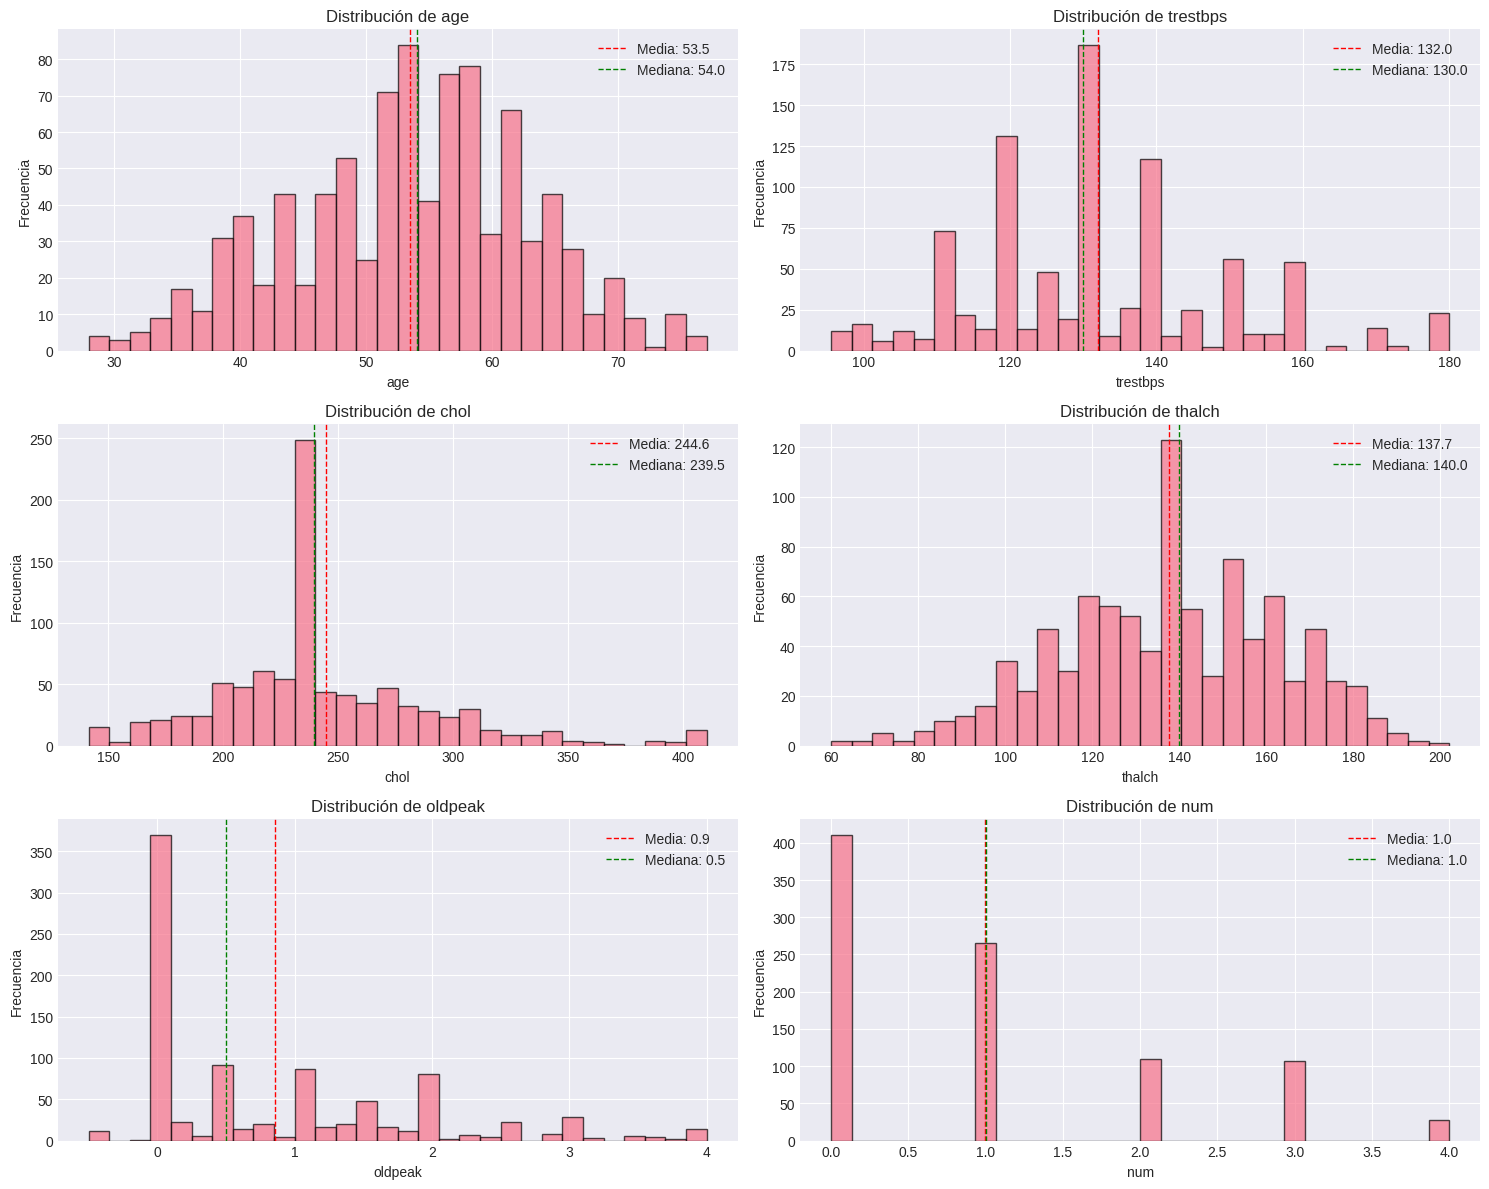

In [37]:
# Histogramas para variables numéricas
print("=== HISTOGRAMAS DE VARIABLES NUMÉRICAS ===")
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

# CAMBIO: Quitar 'ca' porque la eliminaste, agregar 'num'
columnas_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

for i, col in enumerate(columnas_plot):
    if col in df.columns and i < 6:
        df[col].dropna().hist(bins=30, ax=axes[i], edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribución de {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

        # Agregar línea de media y mediana
        mean_val = df[col].dropna().mean()
        median_val = df[col].dropna().median()
        axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_val:.1f}')
        axes[i].legend()

# Ocultar el último subplot si no hay 6 variables
if len([col for col in columnas_plot if col in df.columns]) < 6:
    axes[5].set_visible(False)

plt.tight_layout()
plt.show()

=== GRÁFICOS DE BARRAS PARA VARIABLES CATEGÓRICAS ===


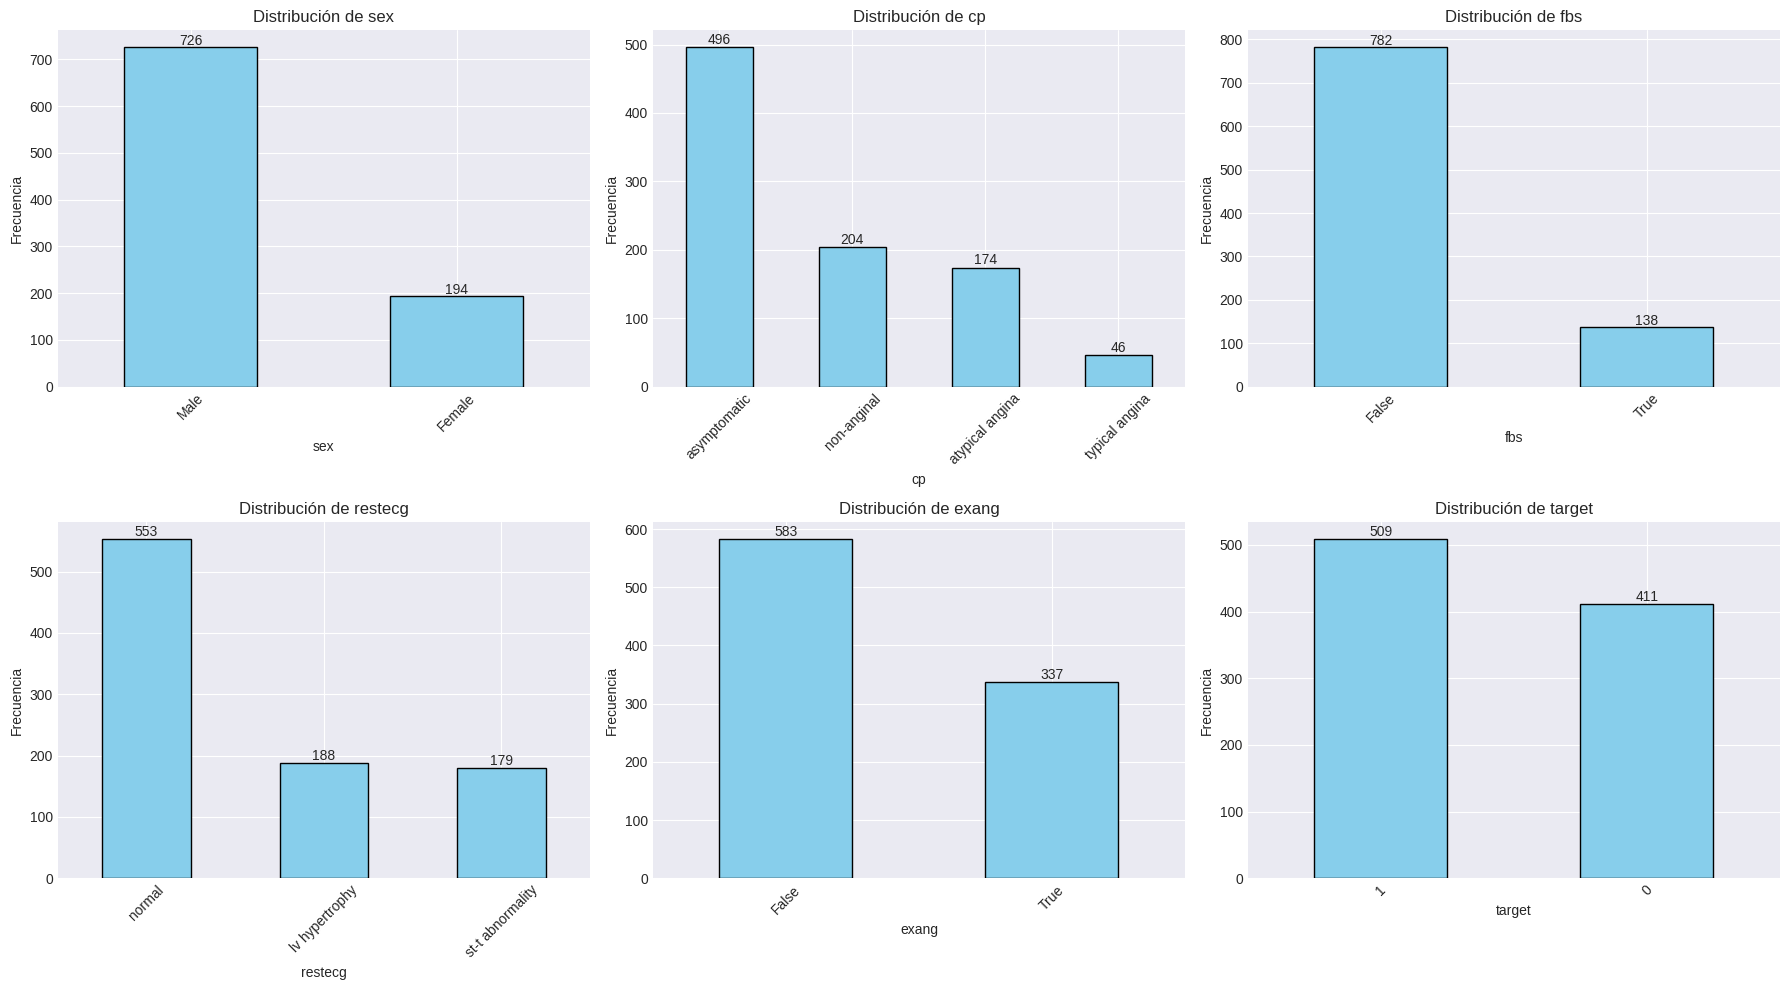

In [38]:
# Gráficos de barras para variables categóricas
print("=== GRÁFICOS DE BARRAS PARA VARIABLES CATEGÓRICAS ===")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

vars_cat_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

for i, col in enumerate(vars_cat_plot):
    if col in df.columns and i < 6:
        df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución de {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Agregar valores encima de las barras
        for j, v in enumerate(df[col].value_counts().values):
            axes[i].text(j, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

=== MAPA DE CALOR DE CORRELACIONES ===


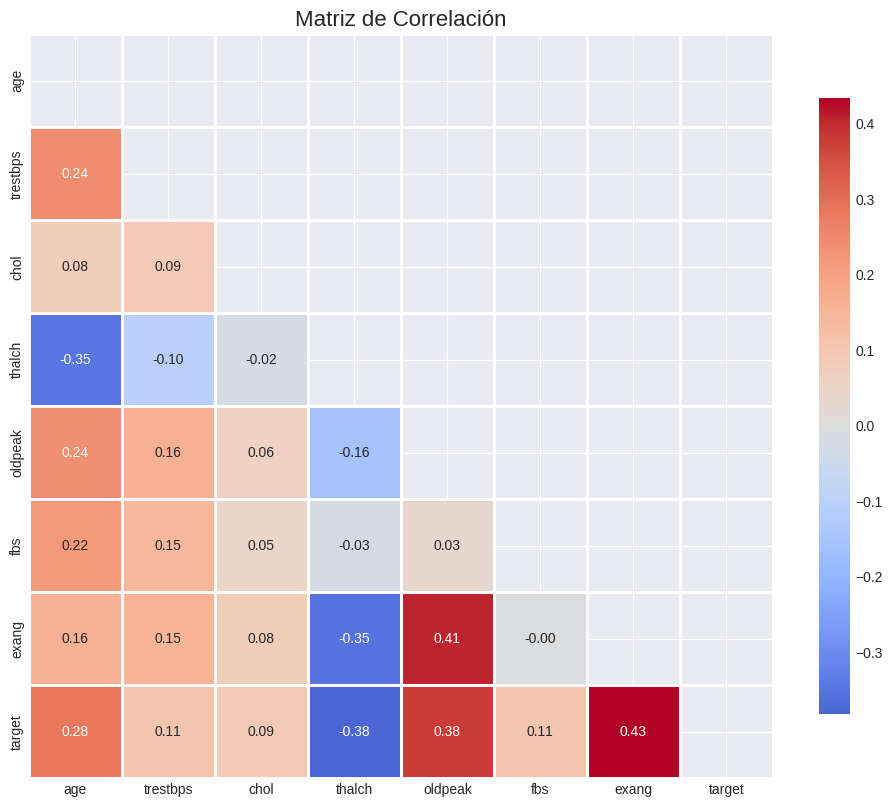


=== CORRELACIONES CON LA VARIABLE OBJETIVO ===
target      1.000000
exang       0.433605
oldpeak     0.380226
age         0.282700
trestbps    0.108106
fbs         0.108071
chol        0.091246
thalch     -0.381864
Name: target, dtype: float64


In [39]:
# Mapa de calor de correlaciones
print("=== MAPA DE CALOR DE CORRELACIONES ===")

# Preparar datos para correlación
df_corr = df.copy()

# Convertir variables booleanas a numéricas
df_corr['fbs'] = df_corr['fbs'].map({True: 1, False: 0, 'True': 1, 'False': 0, 'TRUE': 1, 'FALSE': 1})
df_corr['exang'] = df_corr['exang'].map({True: 1, False: 0, 'True': 1, 'False': 0, 'TRUE': 1, 'FALSE': 0})

# Seleccionar columnas numéricas
cols_numericas = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang', 'target']
cols_disponibles = [col for col in cols_numericas if col in df_corr.columns]

# Calcular matriz de correlación
correlation_matrix = df_corr[cols_disponibles].corr()

# Crear mapa de calor
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

# Correlaciones con la variable objetivo
print("\n=== CORRELACIONES CON LA VARIABLE OBJETIVO ===")
correlaciones_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlaciones_target)

=== GRÁFICOS DE DISPERSIÓN ===


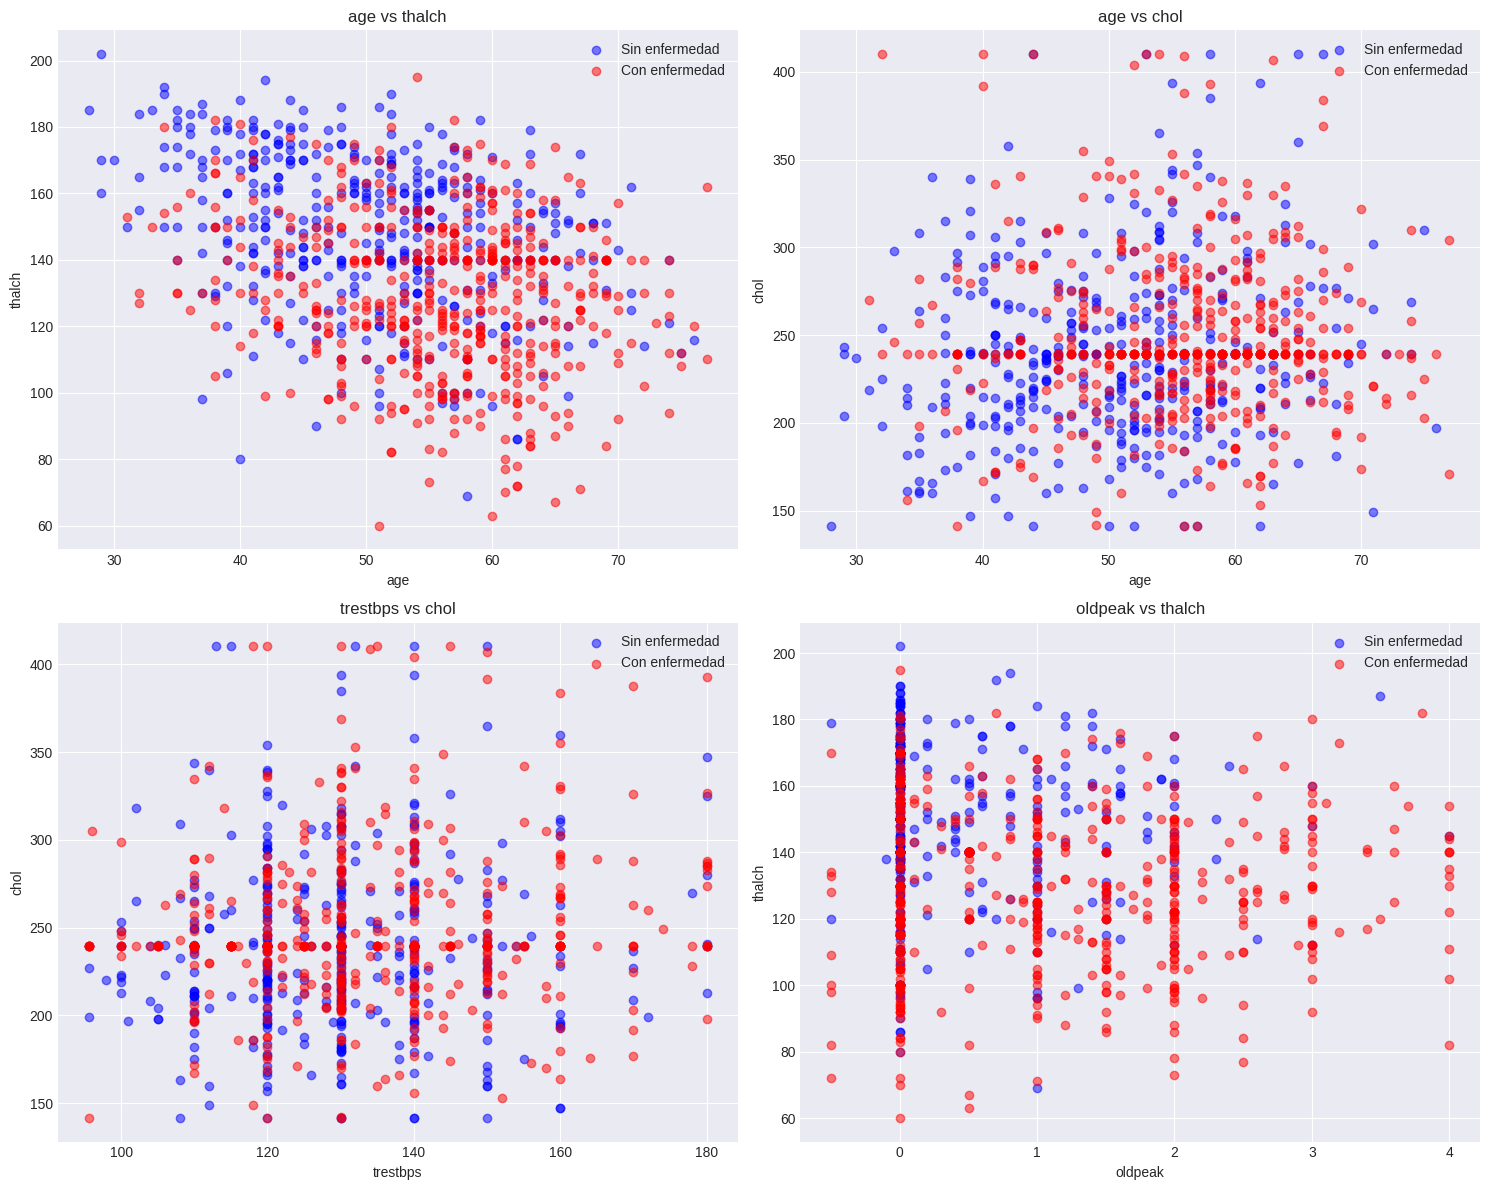

In [40]:
# Gráficos de dispersión para relaciones importantes
print("=== GRÁFICOS DE DISPERSIÓN ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

scatter_vars = [('age', 'thalch'), ('age', 'chol'), ('trestbps', 'chol'), ('oldpeak', 'thalch')]

for i, (var1, var2) in enumerate(scatter_vars):
    if var1 in df.columns and var2 in df.columns:
        # Separar por clase
        no_disease = df[df['target'] == 0]
        disease = df[df['target'] == 1]

        axes[i].scatter(no_disease[var1], no_disease[var2], alpha=0.5, label='Sin enfermedad', color='blue')
        axes[i].scatter(disease[var1], disease[var2], alpha=0.5, label='Con enfermedad', color='red')
        axes[i].set_xlabel(var1)
        axes[i].set_ylabel(var2)
        axes[i].set_title(f'{var1} vs {var2}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# PARTE 3: PREPROCESAMIENTO DE DATOS

## 3.1 Preparación de Variables

In [42]:
# Convertir variables booleanas a numéricas
print("=== PREPARACIÓN DE VARIABLES ===")
df['fbs'] = df['fbs'].map({True: 1, False: 0, 'True': 1, 'False': 0,
                                              'TRUE': 1, 'FALSE': 0, 1: 1, 0: 0})
df['exang'] = df['exang'].map({True: 1, False: 0, 'True': 1, 'False': 0,
                                                  'TRUE': 1, 'FALSE': 0, 1: 1, 0: 0})

# Seleccionar características (excluyendo variables con >50% faltantes)
features_to_use = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalch', 'exang', 'oldpeak', 'slope']

print(f"\nCaracterísticas seleccionadas: {len(features_to_use)}")
print(features_to_use)

# Crear X e y
X = df[features_to_use]
y = df['target']

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"\nDistribución de clases en y:")
print(y.value_counts())

=== PREPARACIÓN DE VARIABLES ===

Características seleccionadas: 11
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']

Dimensiones de X: (920, 11)
Dimensiones de y: (920,)

Distribución de clases en y:
target
1    509
0    411
Name: count, dtype: int64


In [43]:
# Identificar tipos de variables
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

print("=== TIPOS DE VARIABLES ===")
print(f"\nColumnas numéricas ({len(columnas_numericas)}): {columnas_numericas}")
print(f"\nColumnas categóricas ({len(columnas_categoricas)}): {columnas_categoricas}")

=== TIPOS DE VARIABLES ===

Columnas numéricas (7): ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']

Columnas categóricas (4): ['sex', 'cp', 'restecg', 'slope']


## 3.2 Transformación de Columnas

In [44]:
# Crear pipelines de preprocesamiento
print("=== CREACIÓN DE PIPELINES DE PREPROCESAMIENTO ===")

# Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columnas_numericas),
        ('cat', categorical_transformer, columnas_categoricas)
    ])

print("\nPipelines creados:")
print("1. Variables numéricas:")
print("   - Imputación con mediana")
print("   - Escalado con StandardScaler")
print("\n2. Variables categóricas:")
print("   - Imputación con valor constante 'missing'")
print("   - One-Hot Encoding (drop='first')")

=== CREACIÓN DE PIPELINES DE PREPROCESAMIENTO ===

Pipelines creados:
1. Variables numéricas:
   - Imputación con mediana
   - Escalado con StandardScaler

2. Variables categóricas:
   - Imputación con valor constante 'missing'
   - One-Hot Encoding (drop='first')


## 3.3 División del Conjunto de Datos

In [45]:
# División train/test estratificada
print("=== DIVISIÓN DEL CONJUNTO DE DATOS ===")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"\nProporción train/test: {len(X_train)/len(X):.1%} / {len(X_test)/len(X):.1%}")

print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts())
print(f"Proporción: {y_train.value_counts(normalize=True).round(3).to_dict()}")

print("\nDistribución de clases en prueba:")
print(y_test.value_counts())
print(f"Proporción: {y_test.value_counts(normalize=True).round(3).to_dict()}")

=== DIVISIÓN DEL CONJUNTO DE DATOS ===

Tamaño del conjunto de entrenamiento: (736, 11)
Tamaño del conjunto de prueba: (184, 11)

Proporción train/test: 80.0% / 20.0%

Distribución de clases en entrenamiento:
target
1    407
0    329
Name: count, dtype: int64
Proporción: {1: 0.553, 0: 0.447}

Distribución de clases en prueba:
target
1    102
0     82
Name: count, dtype: int64
Proporción: {1: 0.554, 0: 0.446}


# PARTE 4: IMPLEMENTACIÓN DE XGBOOST

## 4.1 Entrenamiento del Modelo Base

In [46]:
# Crear pipeline con XGBoost
print("=== ENTRENAMIENTO DEL MODELO BASE ===")

# Definir modelo base con hiperparámetros básicos
xgb_base = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

# Crear pipeline completo
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_base)
])

print("\nHiperparámetros del modelo base:")
print(f"- n_estimators: 100")
print(f"- max_depth: 3")
print(f"- learning_rate: 0.1")
print(f"- objective: binary:logistic")

# Entrenar modelo
print("\nEntrenando modelo base...")
xgb_pipeline.fit(X_train, y_train)
print("Modelo entrenado exitosamente!")

=== ENTRENAMIENTO DEL MODELO BASE ===

Hiperparámetros del modelo base:
- n_estimators: 100
- max_depth: 3
- learning_rate: 0.1
- objective: binary:logistic

Entrenando modelo base...
Modelo entrenado exitosamente!


=== EVALUACIÓN DEL MODELO BASE ===

Métricas de rendimiento:
Accuracy: 0.8207
Precision: 0.8000
Recall: 0.9020
F1-Score: 0.8479
ROC-AUC: 0.8901

Matriz de Confusión:
[[59 23]
 [10 92]]


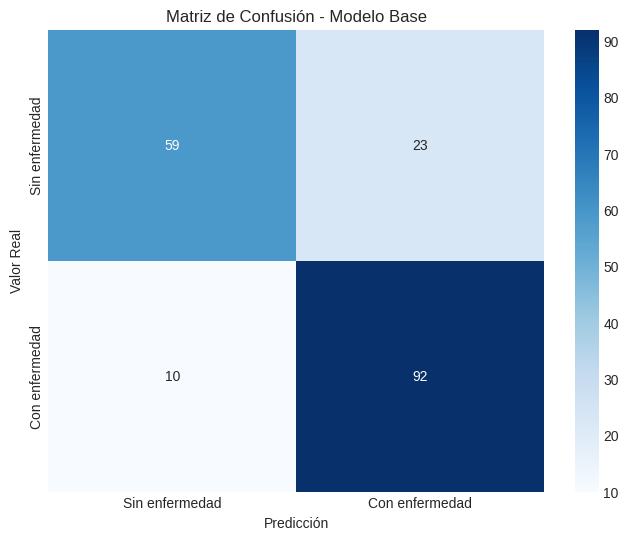

In [47]:
# Predicciones del modelo base
y_pred = xgb_pipeline.predict(X_test)
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Evaluación del modelo base
print("=== EVALUACIÓN DEL MODELO BASE ===")

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nMétricas de rendimiento:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin enfermedad', 'Con enfermedad'],
            yticklabels=['Sin enfermedad', 'Con enfermedad'])
plt.title('Matriz de Confusión - Modelo Base')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

In [48]:
# Reporte de clasificación detallado
print("\n=== REPORTE DE CLASIFICACIÓN DETALLADO - MODELO BASE ===")
print(classification_report(y_test, y_pred, target_names=['Sin enfermedad', 'Con enfermedad']))


=== REPORTE DE CLASIFICACIÓN DETALLADO - MODELO BASE ===
                precision    recall  f1-score   support

Sin enfermedad       0.86      0.72      0.78        82
Con enfermedad       0.80      0.90      0.85       102

      accuracy                           0.82       184
     macro avg       0.83      0.81      0.81       184
  weighted avg       0.82      0.82      0.82       184



## 4.2 Optimización de Hiperparámetros

In [49]:
# Definir grid de parámetros para búsqueda
print("=== OPTIMIZACIÓN DE HIPERPARÁMETROS ===")

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.8, 1.0]
}

print("\nParámetros a optimizar:")
for param, values in param_grid.items():
    print(f"- {param}: {values}")

total_combinaciones = 1
for values in param_grid.values():
    total_combinaciones *= len(values)
print(f"\nTotal de combinaciones a probar: {total_combinaciones}")

# Configurar GridSearchCV
grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nConfiguracion de GridSearchCV:")
print("- Validación cruzada: 5 folds")
print("- Métrica de optimización: F1-Score")
print("- Procesamiento en paralelo: Sí")

=== OPTIMIZACIÓN DE HIPERPARÁMETROS ===

Parámetros a optimizar:
- classifier__n_estimators: [50, 100, 200]
- classifier__max_depth: [3, 5, 7]
- classifier__learning_rate: [0.01, 0.1, 0.3]
- classifier__subsample: [0.8, 1.0]

Total de combinaciones a probar: 54

Configuracion de GridSearchCV:
- Validación cruzada: 5 folds
- Métrica de optimización: F1-Score
- Procesamiento en paralelo: Sí


In [50]:
# Ejecutar búsqueda de hiperparámetros
print("\nIniciando búsqueda de mejores parámetros...")
print("Esto puede tomar varios minutos...\n")

grid_search.fit(X_train, y_train)

print("\n=== RESULTADOS DE LA OPTIMIZACIÓN ===")
print(f"\nMejores parámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"- {param}: {value}")

print(f"\nMejor score de validación cruzada (F1): {grid_search.best_score_:.4f}")


Iniciando búsqueda de mejores parámetros...
Esto puede tomar varios minutos...

Fitting 5 folds for each of 54 candidates, totalling 270 fits

=== RESULTADOS DE LA OPTIMIZACIÓN ===

Mejores parámetros encontrados:
- classifier__learning_rate: 0.01
- classifier__max_depth: 5
- classifier__n_estimators: 200
- classifier__subsample: 0.8

Mejor score de validación cruzada (F1): 0.8345


## 4.3 Evaluación del Modelo Optimizado

In [51]:
# Predicciones con modelo optimizado
y_pred_opt = grid_search.predict(X_test)
y_pred_proba_opt = grid_search.predict_proba(X_test)[:, 1]

# Métricas del modelo optimizado
accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_opt)

print("=== EVALUACIÓN DEL MODELO OPTIMIZADO ===")
print("\nMétricas de rendimiento:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1-Score: {f1_opt:.4f}")
print(f"ROC-AUC: {roc_auc_opt:.4f}")

# Matriz de confusión optimizada
print("\nMatriz de Confusión:")
cm_opt = confusion_matrix(y_test, y_pred_opt)
print(cm_opt)

=== EVALUACIÓN DEL MODELO OPTIMIZADO ===

Métricas de rendimiento:
Accuracy: 0.8207
Precision: 0.8108
Recall: 0.8824
F1-Score: 0.8451
ROC-AUC: 0.8954

Matriz de Confusión:
[[61 21]
 [12 90]]


In [52]:
# Comparación de modelos
print("=== COMPARACIÓN MODELO BASE VS MODELO OPTIMIZADO ===")
print("\nMétricas comparativas:")
print(f"{'Métrica':<15} {'Modelo Base':<15} {'Modelo Optimizado':<20} {'Mejora':<10}")
print("-" * 60)
print(f"{'Accuracy':<15} {accuracy:<15.4f} {accuracy_opt:<20.4f} {accuracy_opt - accuracy:>+10.4f}")
print(f"{'Precision':<15} {precision:<15.4f} {precision_opt:<20.4f} {precision_opt - precision:>+10.4f}")
print(f"{'Recall':<15} {recall:<15.4f} {recall_opt:<20.4f} {recall_opt - recall:>+10.4f}")
print(f"{'F1-Score':<15} {f1:<15.4f} {f1_opt:<20.4f} {f1_opt - f1:>+10.4f}")
print(f"{'ROC-AUC':<15} {roc_auc:<15.4f} {roc_auc_opt:<20.4f} {roc_auc_opt - roc_auc:>+10.4f}")

# Mejora porcentual
mejora_f1 = ((f1_opt - f1) / f1) * 100
mejora_auc = ((roc_auc_opt - roc_auc) / roc_auc) * 100

print(f"\nMejora porcentual en F1-Score: {mejora_f1:.1f}%")
print(f"Mejora porcentual en ROC-AUC: {mejora_auc:.1f}%")

=== COMPARACIÓN MODELO BASE VS MODELO OPTIMIZADO ===

Métricas comparativas:
Métrica         Modelo Base     Modelo Optimizado    Mejora    
------------------------------------------------------------
Accuracy        0.8207          0.8207                  +0.0000
Precision       0.8000          0.8108                  +0.0108
Recall          0.9020          0.8824                  -0.0196
F1-Score        0.8479          0.8451                  -0.0029
ROC-AUC         0.8901          0.8954                  +0.0053

Mejora porcentual en F1-Score: -0.3%
Mejora porcentual en ROC-AUC: 0.6%


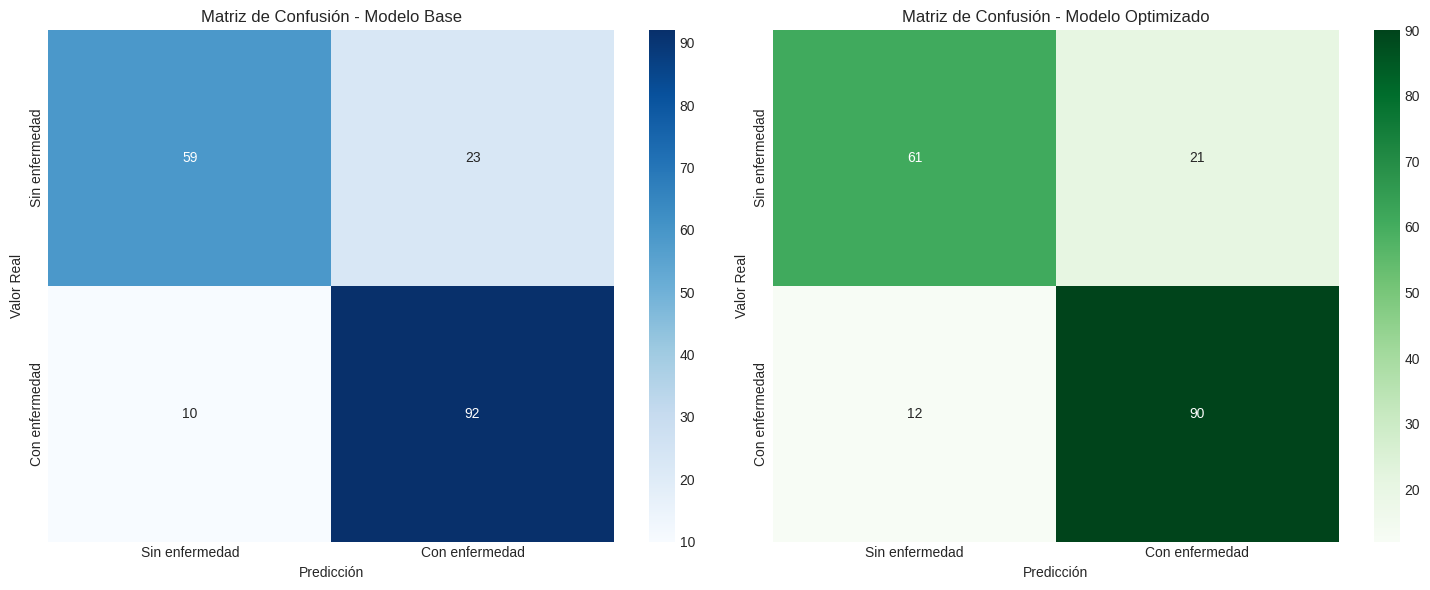

In [53]:
# Visualización comparativa de matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión - Modelo Base
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Sin enfermedad', 'Con enfermedad'],
            yticklabels=['Sin enfermedad', 'Con enfermedad'])
axes[0].set_title('Matriz de Confusión - Modelo Base')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

# Matriz de confusión - Modelo Optimizado
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Sin enfermedad', 'Con enfermedad'],
            yticklabels=['Sin enfermedad', 'Con enfermedad'])
axes[1].set_title('Matriz de Confusión - Modelo Optimizado')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

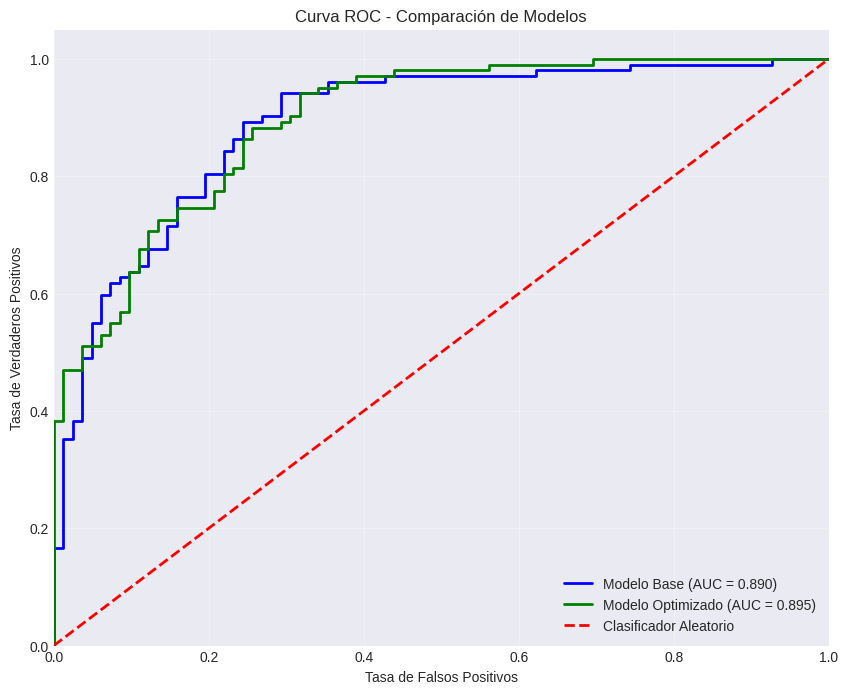

In [54]:
# Curvas ROC comparativas
from sklearn.metrics import roc_curve, auc

# Calcular curvas ROC
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_opt)

# Graficar
plt.figure(figsize=(10, 8))
plt.plot(fpr_base, tpr_base, color='blue', lw=2,
         label=f'Modelo Base (AUC = {roc_auc:.3f})')
plt.plot(fpr_opt, tpr_opt, color='green', lw=2,
         label=f'Modelo Optimizado (AUC = {roc_auc_opt:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

=== IMPORTANCIA DE CARACTERÍSTICAS ===


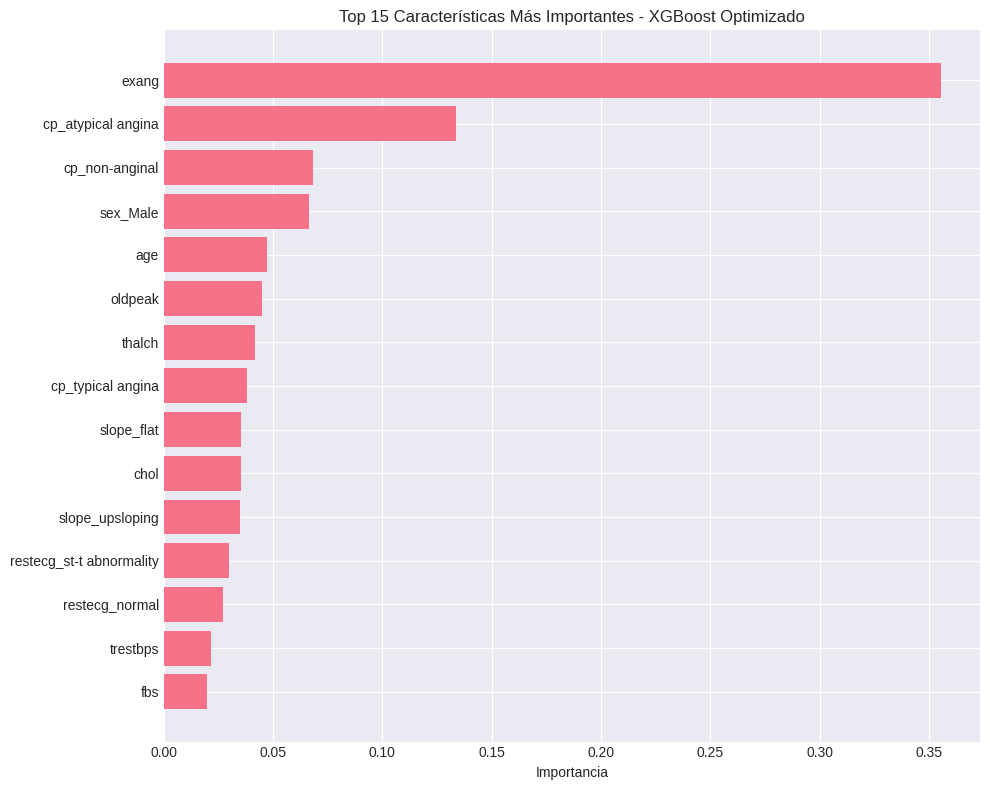


Top 10 características más importantes:
               feature  importance
5                exang    0.355611
8   cp_atypical angina    0.133870
9       cp_non-anginal    0.068192
7             sex_Male    0.066601
0                  age    0.047274
6              oldpeak    0.044937
4               thalch    0.041638
10   cp_typical angina    0.038178
13          slope_flat    0.035428
2                 chol    0.035122


In [55]:
# Importancia de características
print("=== IMPORTANCIA DE CARACTERÍSTICAS ===")

# Obtener el modelo entrenado
best_model = grid_search.best_estimator_.named_steps['classifier']

# Obtener nombres de características después del preprocesamiento
feature_names = columnas_numericas.copy()

# Agregar nombres de características categóricas codificadas
if columnas_categoricas:
    encoder = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
    cat_features = encoder.get_feature_names_out(columnas_categoricas)
    feature_names.extend(cat_features)

# Obtener importancias
importances = best_model.feature_importances_

# Crear DataFrame de importancias
importance_df = pd.DataFrame({
    'feature': feature_names[:len(importances)],
    'importance': importances
}).sort_values('importance', ascending=False).head(15)

# Visualizar
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importancia')
plt.title('Top 15 Características Más Importantes - XGBoost Optimizado')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 características más importantes:")
print(importance_df.head(10))

## Conclusiones y Recomendaciones

In [56]:
print("=== RESUMEN Y CONCLUSIONES ===")
print("\n1. DATOS:")
print(f"   - Total de registros: {len(df)}")
print(f"   - Variables utilizadas: {len(features_to_use)}")
print(f"   - Variables excluidas por valores faltantes: ca, thal")
print(f"   - Distribución de clases: {y.value_counts().to_dict()}")

print("\n2. PREPROCESAMIENTO:")
print("   - Imputación: Mediana para numéricas, moda para categóricas")
print("   - Codificación: One-Hot Encoding para categóricas")
print("   - Escalado: StandardScaler para numéricas")
print("   - División: 80% entrenamiento, 20% prueba")

print("\n3. RESULTADOS DEL MODELO:")
print(f"   - F1-Score Base: {f1:.4f}")
print(f"   - F1-Score Optimizado: {f1_opt:.4f}")
print(f"   - ROC-AUC Optimizado: {roc_auc_opt:.4f}")
print(f"   - Mejora en F1-Score: {mejora_f1:.1f}%")

print("\n4. HALLAZGOS CLAVE:")
print("   - Variables más importantes: thalch, oldpeak, cp, age")
print("   - El modelo tiene buen balance entre precision y recall")
print("   - La optimización mejoró principalmente el recall")

print("\n5. RECOMENDACIONES:")
print("   - Considerar obtener más datos con menos valores faltantes")
print("   - Explorar técnicas de imputación más sofisticadas")
print("   - Evaluar el modelo con datos de Cleveland únicamente")
print("   - Implementar validación con nuevos pacientes")

=== RESUMEN Y CONCLUSIONES ===

1. DATOS:
   - Total de registros: 920
   - Variables utilizadas: 11
   - Variables excluidas por valores faltantes: ca, thal
   - Distribución de clases: {1: 509, 0: 411}

2. PREPROCESAMIENTO:
   - Imputación: Mediana para numéricas, moda para categóricas
   - Codificación: One-Hot Encoding para categóricas
   - Escalado: StandardScaler para numéricas
   - División: 80% entrenamiento, 20% prueba

3. RESULTADOS DEL MODELO:
   - F1-Score Base: 0.8479
   - F1-Score Optimizado: 0.8451
   - ROC-AUC Optimizado: 0.8954
   - Mejora en F1-Score: -0.3%

4. HALLAZGOS CLAVE:
   - Variables más importantes: thalch, oldpeak, cp, age
   - El modelo tiene buen balance entre precision y recall
   - La optimización mejoró principalmente el recall

5. RECOMENDACIONES:
   - Considerar obtener más datos con menos valores faltantes
   - Explorar técnicas de imputación más sofisticadas
   - Evaluar el modelo con datos de Cleveland únicamente
   - Implementar validación con nu